In [1]:
import tensorflow as tf

from tensorflow import keras

from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout, TimeDistributed
from keras import Sequential

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.1.0


In [3]:
import pandas as pd

In [4]:
import os
import matplotlib.image as mpimg
from itertools import chain

In [5]:
path = '/Users/thomas/Documents/ASL/Full Image ASL/asl-alphabet/'

In [6]:
#Note lowercase d is delete, lowercase n is nothing, lowercase s is space

class_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
              'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
print(class_list.index('A'))

0


In [8]:
imgTrainArray = []
imgTrainLabels = []
for directory in os.listdir(path + 'asl_alphabet_train/asl_alphabet_train'):
    if directory != '.DS_Store':
        count = 0
        for file in os.listdir(path + 'asl_alphabet_train/asl_alphabet_train/' + directory):
            if (count <= 200 and file[:1] != 'Z' and file[:1] != 'J'):
                count += 1
                print(class_list.index(file[:1]))
                imgTrainArray.append(np.array(mpimg.imread(path + 'asl_alphabet_train/asl_alphabet_train/'
                                                  + directory + '/' + file)).reshape(40000,3))
                imgTrainLabels.append(class_list.index(file[:1]))
            
            
            
            

18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
2

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
1

In [13]:
imgTrainArray = np.array(imgTrainArray)
print(imgTrainArray.shape)
print(imgTrainLabels)

(5427, 40000, 3)
[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22

In [14]:
columns = []
for i in range(0,40000):
    columns.append('pixel' + str(i))

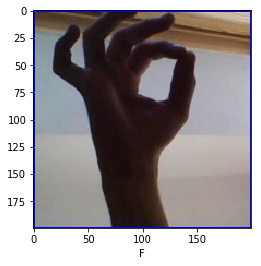

In [16]:
import random
number = random.randint(0,5400)
plt.imshow(imgTrainArray.reshape(5427,200,200,3)[number])
plt.xlabel(class_list[imgTrainLabels[number]])
plt.show()

In [17]:
#imgTrainArray = pd.DataFrame(imgTrainArray, columns=columns)
print(imgTrainArray)

[[[  0   0 252]
  [  1   4 255]
  [  0   0 252]
  ...
  [ 10  11 189]
  [  0   8 195]
  [  0  10 220]]

 [[  0   6 254]
  [  0   1 254]
  [  7   0 254]
  ...
  [  4  10 192]
  [  2  10 196]
  [  1   7 215]]

 [[  0   4 247]
  [  3   3 255]
  [  4   0 250]
  ...
  [  9   7 192]
  [  8   9 198]
  [  1   5 216]]

 ...

 [[  0   0 249]
  [  7   0 255]
  [  9   0 252]
  ...
  [  5   5 191]
  [  4   7 200]
  [  2   5 222]]

 [[  0   7 252]
  [  0   7 255]
  [  0   0 253]
  ...
  [ 14   2 188]
  [ 14   8 202]
  [  0   4 218]]

 [[  0   2 252]
  [  0   4 255]
  [  0   0 252]
  ...
  [ 11   7 190]
  [  5  11 197]
  [  0  10 218]]]


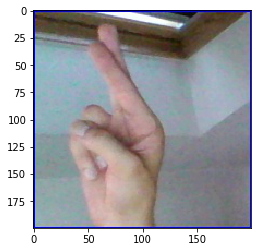

In [22]:
plt.imshow(np.array(imgTrainArray).reshape(5427, 200, 200,3)[3])
plt.show()

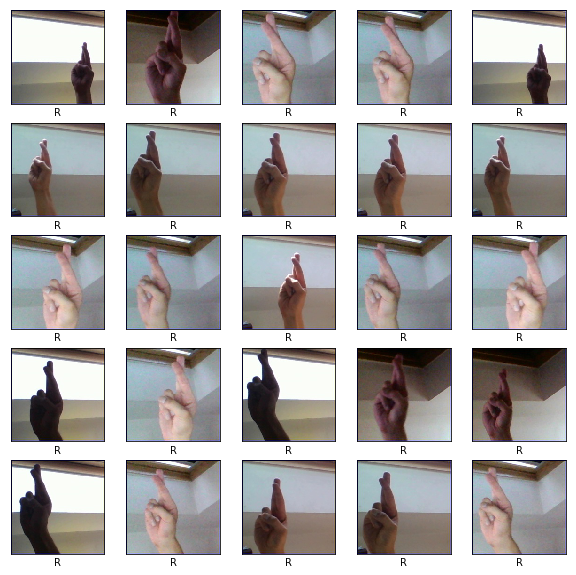

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(imgTrainArray).reshape(5427,200,200,3)[i], cmap=plt.cm.binary)
    plt.xlabel(class_list[imgTrainLabels[i]])
plt.show()

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(27, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
'''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(200,200)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(27, activation='softmax')
])
'''
model.summary()

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
             

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 23, 64)       

In [31]:
history = model.fit(np.array(imgTrainArray).reshape(5427,200,200,3), np.array(imgTrainLabels), epochs=30)

Epoch 1/30
5427/5427 [==============================] - 101s 19ms/step - loss: 8.2425 - accuracy: 0.0317
Epoch 2/30
5427/5427 [==============================] - 101s 19ms/step - loss: 3.2962 - accuracy: 0.0348
Epoch 3/30
5427/5427 [==============================] - 101s 19ms/step - loss: 3.2962 - accuracy: 0.0334
Epoch 4/30
5427/5427 [==============================] - 102s 19ms/step - loss: 3.2962 - accuracy: 0.0346
Epoch 5/30
5427/5427 [==============================] - 101s 19ms/step - loss: 3.2962 - accuracy: 0.0308
Epoch 6/30
5427/5427 [==============================] - 101s 19ms/step - loss: 3.2962 - accuracy: 0.0311
Epoch 7/30
5427/5427 [==============================] - 101s 19ms/step - loss: 3.2962 - accuracy: 0.0326
Epoch 8/30
5427/5427 [==============================] - 101s 19ms/step - loss: 3.2962 - accuracy: 0.0315
Epoch 9/30
5427/5427 [==============================] - 101s 19ms/step - loss: 3.2962 - accuracy: 0.0345
Epoch 10/30
5427/5427 [==============================] 

KeyboardInterrupt: 